<ipython-input-1-30a9f5ec8440>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-1-30a9f5ec8440>:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


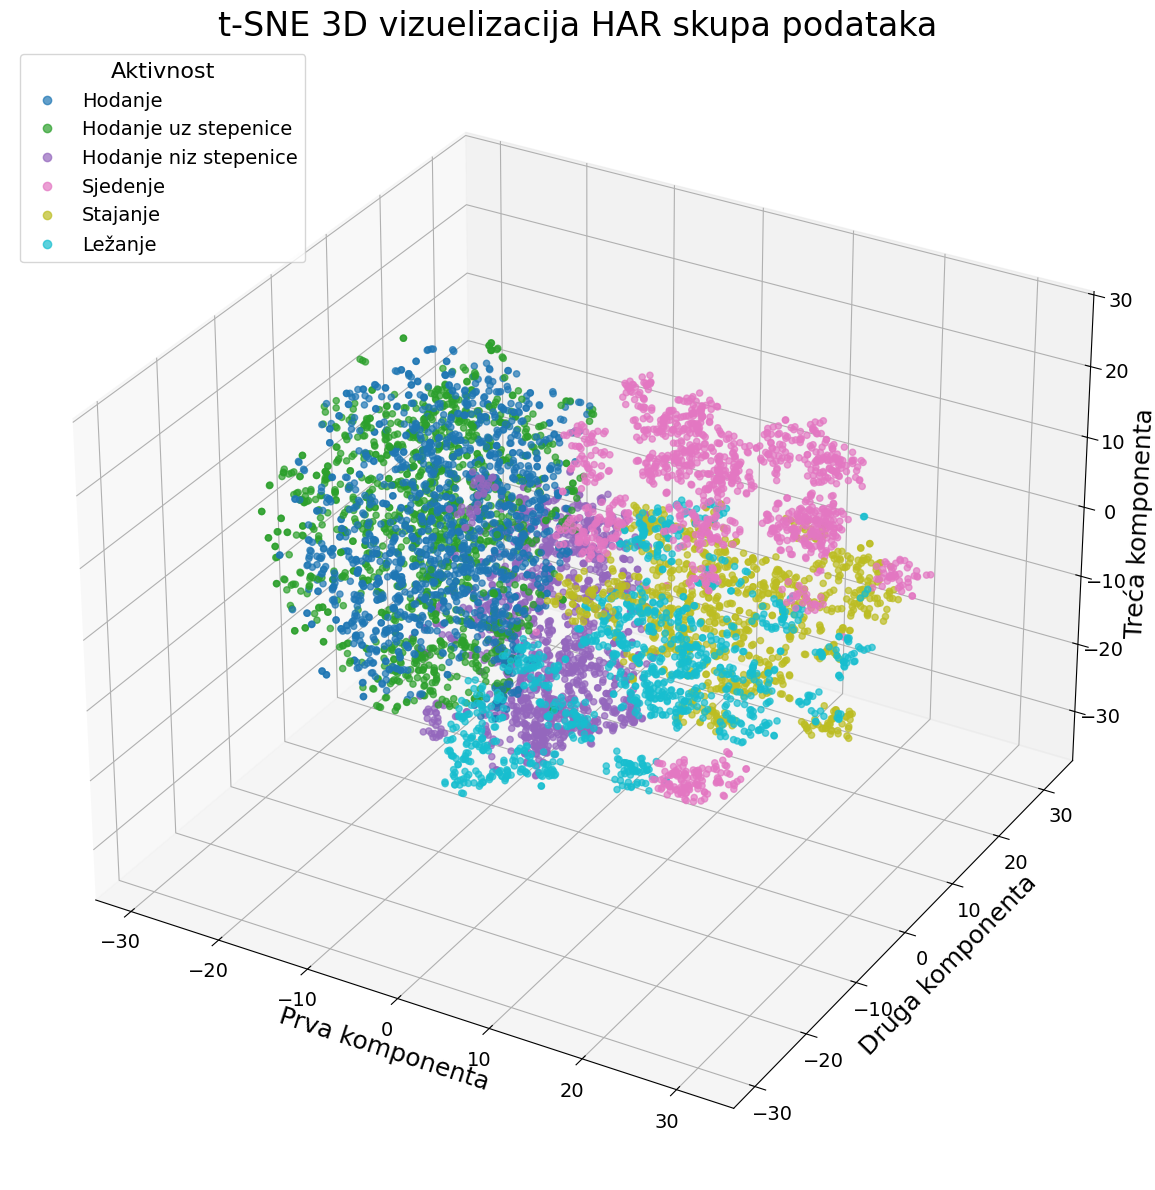

In [1]:
# Instalacija potrebnih paketa
!pip install -q scikit-learn matplotlib seaborn

# Importovanje biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Preuzimanje HAR dataset-a
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip -q -o "UCI HAR Dataset.zip"

# Učitavanje podataka
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', delim_whitespace=True, header=None)

# Mapiranje oznaka na imena aktivnosti
activity_labels = {
    1: 'Hodanje',
    2: 'Hodanje uz stepenice',
    3: 'Hodanje niz stepenice',
    4: 'Sjedenje',
    5: 'Stajanje',
    6: 'Ležanje'
}

# Standardizacija podataka
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Primjena t-SNE za redukciju dimenzionalnosti na 3D
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X_scaled)

# Pretvaranje u DataFrame kako bi vizuelizacija bila lakša
df_embedded = pd.DataFrame()
df_embedded['Dim1'] = X_embedded[:, 0]
df_embedded['Dim2'] = X_embedded[:, 1]
df_embedded['Dim3'] = X_embedded[:, 2]
df_embedded['Label'] = y_train[0].map(activity_labels)

# Plot 3D
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Odabir prikaza
scatter = ax.scatter(
    df_embedded['Dim1'],
    df_embedded['Dim2'],
    df_embedded['Dim3'],
    c=pd.factorize(df_embedded['Label'])[0],
    cmap='tab10',
    alpha=0.7
)


ax.set_title('t-SNE 3D vizuelizacija HAR skupa podataka', fontsize=24)
ax.set_xlabel('Prva komponenta', fontsize=18)
ax.set_ylabel('Druga komponenta', fontsize=18)
ax.set_zlabel('Treća komponenta', fontsize=18)


ax.tick_params(axis='both', which='major', labelsize=14)

# Legenda
handles, _ = scatter.legend_elements()
labels = list(activity_labels.values())
ax.legend(handles, labels, title="Aktivnost", loc='upper left', fontsize=14, title_fontsize=16)

plt.tight_layout()
plt.show()